-------------------------------------------------------
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64


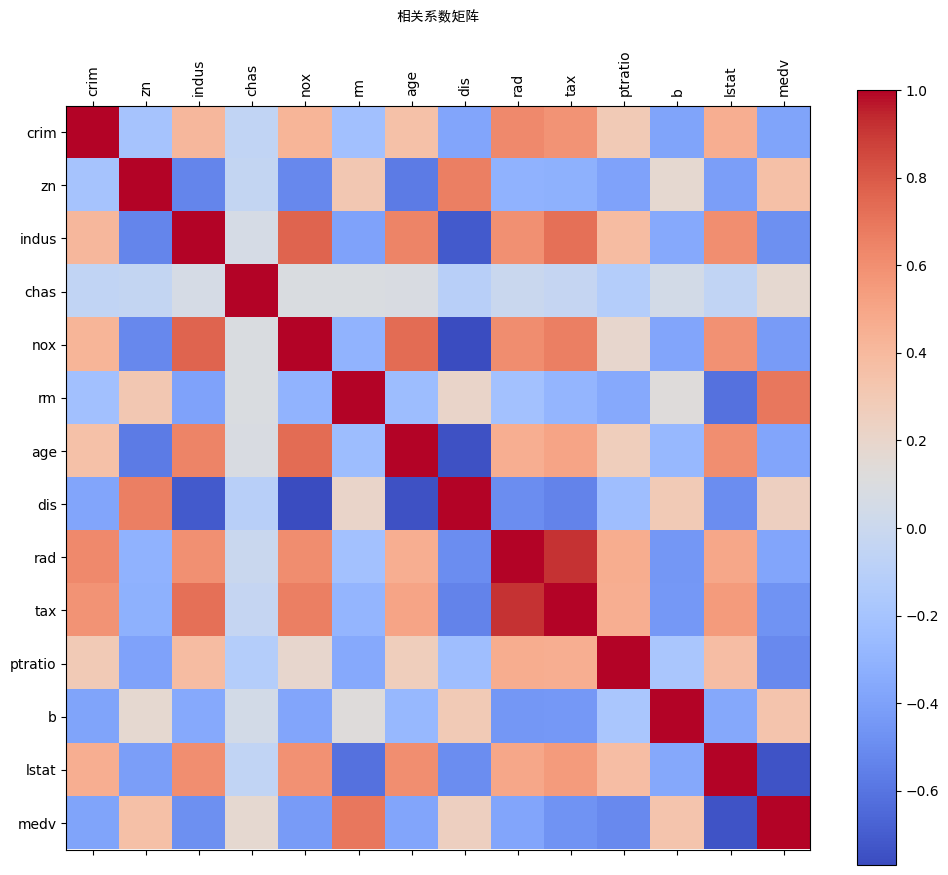

LinearRegression 最佳参数: {}
Ridge 最佳参数: {'alpha': 10.0}
Lasso 最佳参数: {'alpha': 0.1}
SVR 最佳参数: {'C': 10.0, 'kernel': 'rbf'}
RandomForest 最佳参数: {'max_depth': 20, 'n_estimators': 200}
-------------------------------------------------------
---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---

RandomForest - 计算均方误差 (MSE): 8.494866083187846
-------------------------------------------------------

--- R² : 反映模型解释数据变异的程度，值越接近1越好---

RandomForest - 决定系数 (R²): 0.8841616276005249

-------------------------------------------------------

---耗时---训练数据得分---测试数据得分-------------
elaspe:9.031250;train_score:0.940930;test_score:0.805629
-------------------------------------------------------
多项式次数 2 - 均方误差 (MSE): 14.257338168909754
多项式次数 2 - 决定系数 (R²): 0.8055829447972125
多项式次数 3 - 均方误差 (MSE): 16476.011012737505
多项式次数 3 - 决定系数 (R²): -223.6714993104543
多项式次数 4 - 均方误差 (MSE): 1016.8009239852063
多项式次数 4 - 决定系数 (R²): -12.86538209493798
多项式次数 5 - 均方误差 (MSE): 504.88053946720254
多项式次数 5 - 决定系数 (R²): -5.884692398364725


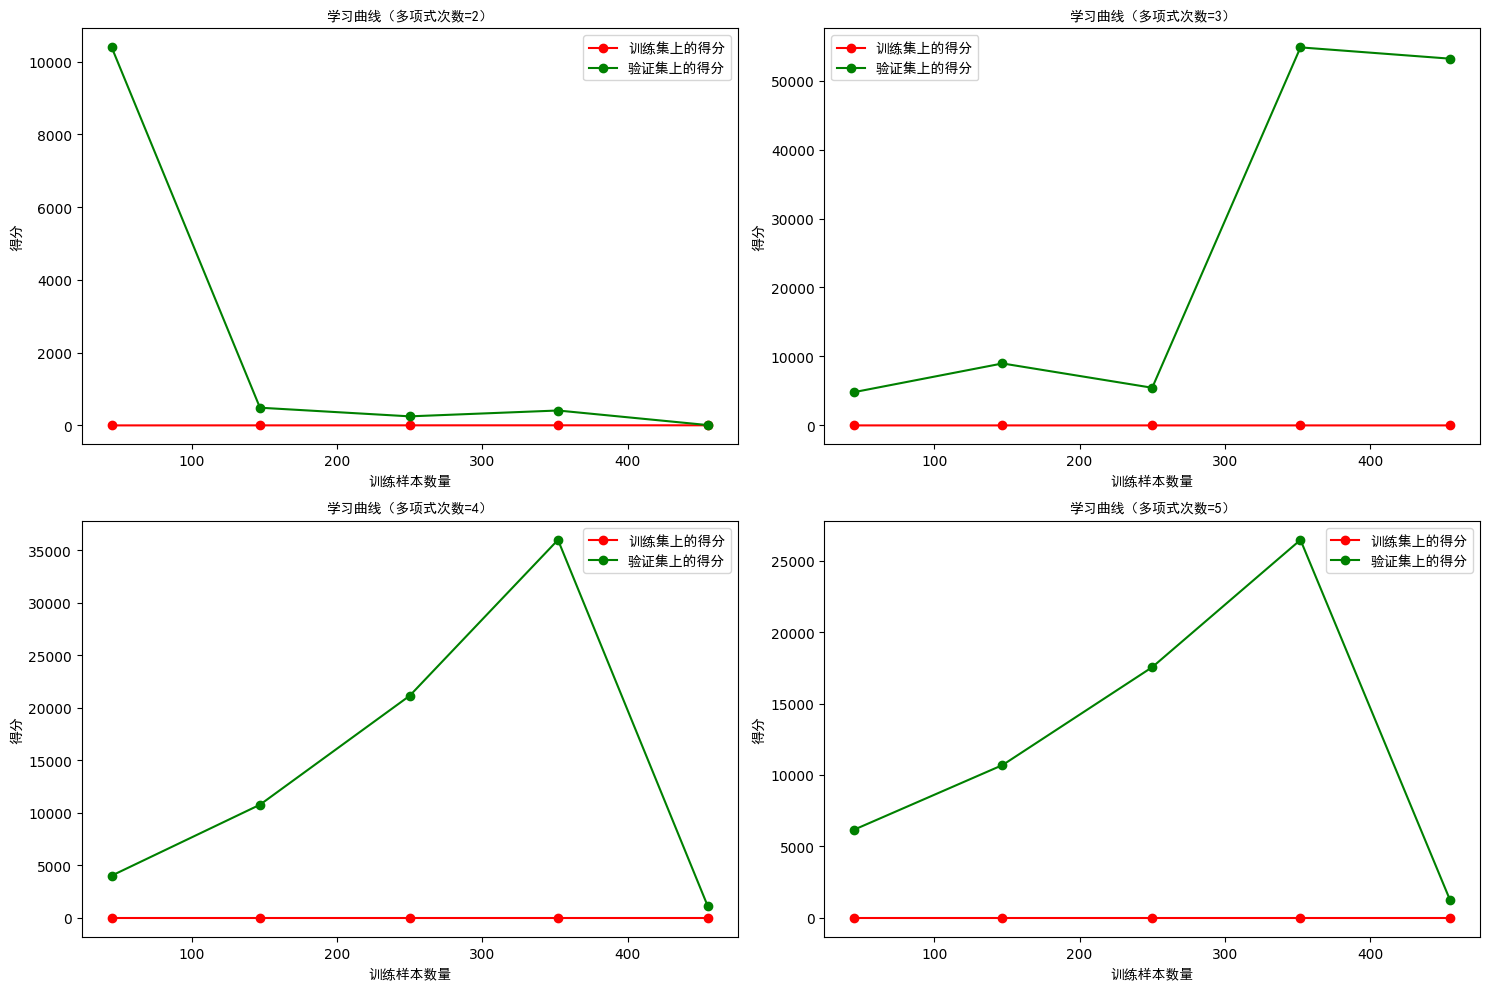

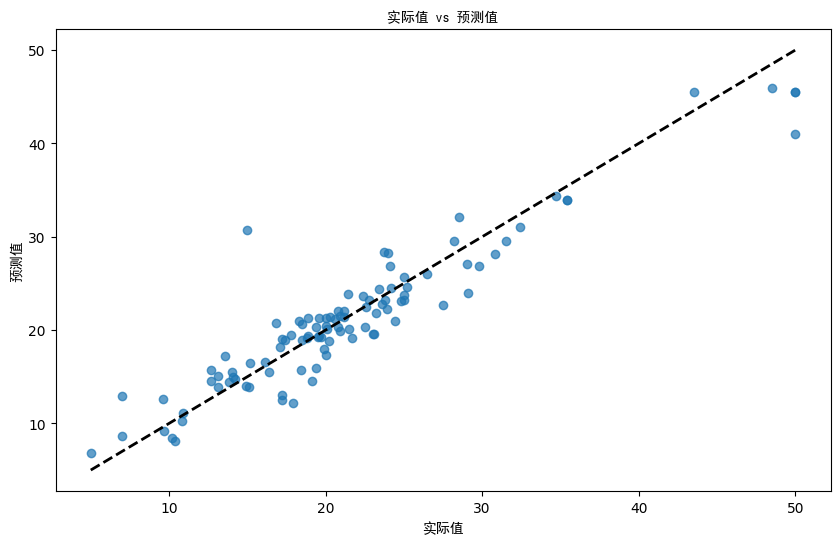

In [8]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算
import time

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV  # 数据划分、交叉验证、学习曲线、网格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # 数据标准化、多项式特征
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归模型
from sklearn.svm import SVR  # 支持向量回归
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估

# 加载数据集
file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Boston Housing.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 修正目标列名，去除多余空格
data.rename(columns={'medv ': 'medv'}, inplace=True)

# 显示数据集的基本信息
print('-------------------------------------------------------')
print(data.head())  # 显示数据集前几行
print('-------------------------------------------------------')
print(data.info())  # 显示数据集基本信息
print('-------------------------------------------------------')
print(data.describe())  # 显示数据集描述性统计信息
print('-------------------------------------------------------')
print(data.isnull().sum())  # 检查数据集中各列的缺失值数量
print('-------------------------------------------------------')

# 计算并显示各特征之间的相关性
correlation_matrix = data.corr()
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('相关系数矩阵', pad=20, fontproperties='SimHei')
plt.show()

# 数据预处理
X = data.drop('medv', axis=1)  # 将数据分为特征变量（X）和目标变量（y）
y = data['medv']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 定义要评估的模型和参数
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor()
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# 进行网格搜索和交叉验证

best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f'{name} 最佳参数: {grid_search.best_params_}')
print('-------------------------------------------------------')

# 评估每个模型的性能
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
print('---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---')
print('')
print(f'{name} - 计算均方误差 (MSE): {mse}')
print('-------------------------------------------------------')
print('')
print('--- R² : 反映模型解释数据变异的程度，值越接近1越好---')
print('')
print(f'{name} - 决定系数 (R²): {r2}')
print('')
print('-------------------------------------------------------')

print('')
print('---耗时---训练数据得分---测试数据得分-------------')
# 模型评分和时间记录
def polynomial_model(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

model = polynomial_model(degree=2)
start = time.process_time()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("elaspe:{0:.6f};train_score:{1:0.6f};test_score:{2:.6f}"
      .format(time.process_time() - start, train_score, test_score))
print('-------------------------------------------------------')

# 多项式回归优化模型，并展示不同多项式次数的学习曲线
degrees = [2, 3, 4, 5]  # 尝试不同的多项式次数
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    scaler_poly = StandardScaler()
    X_train_poly = scaler_poly.fit_transform(X_train_poly)
    X_test_poly = scaler_poly.transform(X_test_poly)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train_poly)
    y_pred_poly = model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)

    print(f'多项式次数 {degree} - 均方误差 (MSE): {mse_poly}')
    print(f'多项式次数 {degree} - 决定系数 (R²): {r2_poly}')

    train_sizes, train_scores, test_scores = learning_curve(model_poly, X_poly, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

    train_scores_mean = np.sqrt(-train_scores).mean(axis=1)
    test_scores_mean = np.sqrt(-test_scores).mean(axis=1)

    plt.subplot(2, 2, i+1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='训练集上的得分')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='验证集上的得分')
    plt.xlabel('训练样本数量', fontproperties='SimHei')
    plt.ylabel('得分', fontproperties='SimHei')
    plt.title(f'学习曲线（多项式次数={degree}）', fontproperties='SimHei')
    plt.legend(loc='best', prop={'size': 10, 'family': 'SimHei'})

plt.tight_layout()
plt.show()

# 可视化预测值与实际值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值', fontproperties='SimHei')
plt.ylabel('预测值', fontproperties='SimHei')
plt.title('实际值 vs 预测值', fontproperties='SimHei')
plt.show()
